In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from model import *


hyperparams_dict = {
    "split": 0, # 0 is test split, 1 is validation split
    "repeat": list(range(0, 1024)),
    "epochs": 20,
    "steps_per_epoch": [50],
    "block_layers": [3],
    "hidden_units": 512,
    "num_blocks": 3,
    "block_sharing": True, # [True, False]
    "horizon": 12,
    "history_lookback": 1,
    "init_learning_rate": 1e-3,
    "decay_steps": 3,
    "decay_rate": 0.5,
    "loss": ["pinball", "pmape"], # ["pinball", "mape", "smape", "pmape"]
    "pinball_tau": [0.35], # This is selected to minimize the bias on the validation set
    "batch_size": 256,
    "weight_decay": 0,
    "ts_sampling": ["ts_weight"], # ["uniform", "ts_weight"]
}

HORIZON = 12

hyperparams = Parameters(**hyperparams_dict)


In [26]:
train_dataset = ElectricityLoader(path='../data/data_paper/', split='train')
test_dataset  = ElectricityLoader(path='../data/data_paper/', split='test')

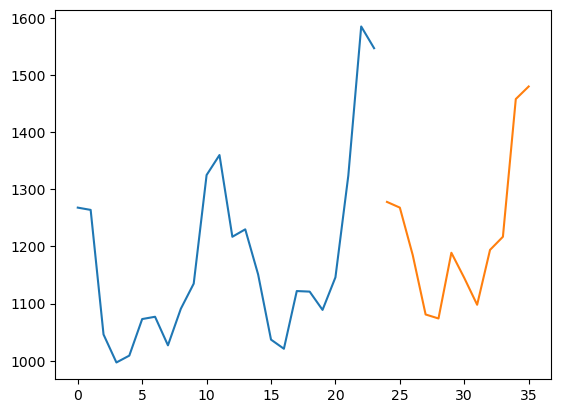

In [27]:
batch = train_dataset.get_batch(win_len=12*2)

plt.plot(batch["history"][0])
plt.plot(np.concatenate([np.nan*np.zeros((24,)), batch["target"][0]]))

In [31]:
batch["history"].shape

(64, 24)

In [34]:
batch["target"].shape

(64, 12)